<a href="https://colab.research.google.com/github/gsingla21/Machine_Learning/blob/main/Adventure%20Works%20Cycles/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

**DATASET loaded from google drive**

In [ ]:
url='/content/drive/MyDrive/ML assignments/Assignment 2/Dataset/AWCustomers.csv'
url2='/content/drive/MyDrive/ML assignments/Assignment 2/Dataset/AWSales.csv'
customer=pd.read_csv(url)
sales=pd.read_csv(url2)
print(customer.columns)
print(sales.columns)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated'],
      dtype='object')
Index(['CustomerID', 'BikeBuyer', 'AvgMonthSpend'], dtype='object')


**Drop Useless features**

In [ ]:
#drop list
drop=["Title","FirstName","MiddleName","LastName","Suffix","AddressLine1","AddressLine2","PostalCode","PhoneNumber", "HomeOwnerFlag"]

customer.drop(axis=1,labels=drop,inplace=True)
customer.reset_index(drop=True, inplace=True)

Check remaining features

In [ ]:
#remaining entries
print(customer.columns)
print(len(customer))

Index(['CustomerID', 'City', 'StateProvinceName', 'CountryRegionName',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated'],
      dtype='object')
18361


**2. DATA Pre-Processing**

2.1 Drop duplicates

In [ ]:
print(customer.drop_duplicates('CustomerID',keep='last'))
print(sales.drop_duplicates('CustomerID',keep='last'))

       CustomerID            City  ... YearlyIncome LastUpdated
0           21173      Wollongong  ...        81916  2017-03-06
1           13249         Shawnee  ...        81076  2017-03-06
2           29350     West Covina  ...        86387  2017-03-06
3           13503       Liverpool  ...        61481  2017-03-06
4           22803           Werne  ...        51804  2017-03-06
...           ...             ...  ...          ...         ...
18356       25414        Coronado  ...        52953  2017-03-06
18357       11459  Port Macquarie  ...        60992  2017-03-06
18358       12160       Beaverton  ...        51859  2017-03-06
18359       14353       Vancouver  ...        87177  2017-03-06
18360       16676       Grossmont  ...       136856  2017-03-06

[18355 rows x 14 columns]
       CustomerID  BikeBuyer  AvgMonthSpend
0           21173          1          50.97
1           13249          1          53.11
2           29350          1          54.08
3           13503          1 

2.2 Merge Customer and sales dataset

In [ ]:
dataset=pd.merge(customer,sales,on='CustomerID')

2.3 Again drop duplicates (just in case)

In [ ]:
print("Before removing duplicates",dataset)
dataset=dataset.drop_duplicates('CustomerID',keep='last')
print("After removing duplicates",dataset)

Before removing duplicates        CustomerID            City  ... BikeBuyer AvgMonthSpend
0           21173      Wollongong  ...         1         50.97
1           13249         Shawnee  ...         1         53.11
2           29350     West Covina  ...         1         54.08
3           13503       Liverpool  ...         1         56.93
4           22803           Werne  ...         1         55.41
...           ...             ...  ...       ...           ...
18356       25414        Coronado  ...         0         48.14
18357       11459  Port Macquarie  ...         1         50.23
18358       12160       Beaverton  ...         1         49.56
18359       14353       Vancouver  ...         0         51.42
18360       16676       Grossmont  ...         1         52.27

[18361 rows x 16 columns]
After removing duplicates        CustomerID            City  ... BikeBuyer AvgMonthSpend
0           21173      Wollongong  ...         1         50.97
1           13249         Shawnee  ...

Get final feature names

In [ ]:
print(dataset.columns)

Index(['CustomerID', 'City', 'StateProvinceName', 'CountryRegionName',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated', 'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')


2.4 Check for Null values

In [ ]:
#Method 1
for i in dataset.columns:
  for j in pd.isna(dataset[i]):
    if j==True:
      print(pd.isna(dataset[i]))

In [ ]:
#Method 2
import numpy as np
(dataset.astype(np.object).isnull()).any()

CustomerID              False
City                    False
StateProvinceName       False
CountryRegionName       False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
LastUpdated             False
BikeBuyer               False
AvgMonthSpend           False
dtype: bool

There is no Null value present to be dealt with.

Get information about dataset.

In [ ]:
print(dataset.info())
print(dataset)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 18360
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            18355 non-null  int64  
 1   City                  18355 non-null  object 
 2   StateProvinceName     18355 non-null  object 
 3   CountryRegionName     18355 non-null  object 
 4   BirthDate             18355 non-null  object 
 5   Education             18355 non-null  object 
 6   Occupation            18355 non-null  object 
 7   Gender                18355 non-null  object 
 8   MaritalStatus         18355 non-null  object 
 9   NumberCarsOwned       18355 non-null  int64  
 10  NumberChildrenAtHome  18355 non-null  int64  
 11  TotalChildren         18355 non-null  int64  
 12  YearlyIncome          18355 non-null  int64  
 13  LastUpdated           18355 non-null  object 
 14  BikeBuyer             18355 non-null  int64  
 15  AvgMonthSpend      

2.5.1 Convert BikeBuyer from int64 to categorical data 

In [ ]:
dataset['BikeBuyer']=dataset['BikeBuyer'].astype('category')
print(type(dataset['BikeBuyer']))

<class 'pandas.core.series.Series'>


In [ ]:
print(dataset['BikeBuyer'])

0        1
1        1
2        1
3        1
4        1
        ..
18356    0
18357    1
18358    1
18359    0
18360    1
Name: BikeBuyer, Length: 18355, dtype: category
Categories (2, int64): [0, 1]


2.5.2 Convert TotalChildren to categorical data

In [ ]:
dataset['TotalChildren']=dataset['TotalChildren'].astype('category')
print(dataset['TotalChildren'])

0        1
1        2
2        0
3        2
4        0
        ..
18356    2
18357    0
18358    0
18359    0
18360    0
Name: TotalChildren, Length: 18355, dtype: category
Categories (4, int64): [0, 1, 2, 3]


2.5.3 Convert NumberChildrenAtHome to categorical data

In [ ]:
dataset['NumberChildrenAtHome']=dataset['NumberChildrenAtHome'].astype('category')
print(dataset['NumberChildrenAtHome'])

0        0
1        1
2        0
3        1
4        0
        ..
18356    0
18357    0
18358    0
18359    0
18360    0
Name: NumberChildrenAtHome, Length: 18355, dtype: category
Categories (4, int64): [0, 1, 2, 3]


2.5.4 Compute BirthDate and LastUpdated to single column Age

In [ ]:
import datetime 
from math import * 
dataset['LastUpdated']=pd.to_datetime(dataset['LastUpdated'])
dataset['BirthDate']=pd.to_datetime(dataset['BirthDate'])
a=dataset['LastUpdated']-dataset['BirthDate']
a=a/np.timedelta64(1,'Y')
a=a.astype('int')
dataset['Age']=a

Drop BirthDate and LastUpdated columns (as there is no need of them left)

In [ ]:
drop=["BirthDate","LastUpdated"]
dataset.drop(axis=1,labels=drop,inplace=True)
dataset.reset_index(drop=True, inplace=True)
print(dataset.columns)

Index(['CustomerID', 'City', 'StateProvinceName', 'CountryRegionName',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'BikeBuyer',
       'AvgMonthSpend', 'Age'],
      dtype='object')


2.6 Bin the age in groups of being child,young and old.


In [ ]:
bins_age = [0,18,40,90]
group_names2=['child','young','old']
Age_Bin=pd.cut(dataset['Age'],bins_age,group_names2,include_lowest=True)
print(Age_Bin)

0        (18.0, 40.0]
1        (40.0, 90.0]
2        (18.0, 40.0]
3        (18.0, 40.0]
4        (40.0, 90.0]
             ...     
18350    (18.0, 40.0]
18351    (18.0, 40.0]
18352    (18.0, 40.0]
18353    (18.0, 40.0]
18354    (18.0, 40.0]
Name: Age, Length: 18355, dtype: category
Categories (3, interval[float64]): [(-0.001, 18.0] < (18.0, 40.0] < (40.0, 90.0]]


2.7.1 Standardization/Normalization of YearlyIncome using Decimal Scaling

In [ ]:
dataset['YearlyIncome']=dataset['YearlyIncome'].div(1000).round(4)
print(dataset['YearlyIncome'])

0         81.916
1         81.076
2         86.387
3         61.481
4         51.804
          ...   
18350     52.953
18351     60.992
18352     51.859
18353     87.177
18354    136.856
Name: YearlyIncome, Length: 18355, dtype: float64


2.7.2 Standardization/Normalization of AvgMonthSpend using Decimal Scaling

In [ ]:
dataset['AvgMonthSpend']=dataset['AvgMonthSpend'].div(1000).round(4)
print(dataset['AvgMonthSpend'])

0        0.0510
1        0.0531
2        0.0541
3        0.0569
4        0.0554
          ...  
18350    0.0481
18351    0.0502
18352    0.0496
18353    0.0514
18354    0.0523
Name: AvgMonthSpend, Length: 18355, dtype: float64


Even Drop CustomerID (no need)

In [ ]:
dataset.drop(axis=1,labels=["CustomerID"],inplace=True)
dataset.reset_index(drop=True, inplace=True)
print(dataset.columns)

Index(['City', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'BikeBuyer',
       'AvgMonthSpend', 'Age'],
      dtype='object')


2.8 Binarization (One Hot Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
onehotencoder.fit_transform(dataset)

<18355x15996 sparse matrix of type '<class 'numpy.float64'>'
	with 256970 stored elements in Compressed Sparse Row format>

# 3.

First Convert Marital Status feature vector into binary form (MaritalStatusUpdated)

In [ ]:
print(dataset.columns)
print(dataset["MaritalStatus"])
a=[]
for i in range(len(dataset["MaritalStatus"])):
  if dataset["MaritalStatus"][i]=='M':
    a.append(1)
  elif dataset["MaritalStatus"][i]=='S':
    a.append(0)
dataset["MaritalStatusUpdated"]=a
print(dataset["MaritalStatusUpdated"])

Index(['City', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'BikeBuyer',
       'AvgMonthSpend', 'Age'],
      dtype='object')
0        M
1        M
2        S
3        M
4        S
        ..
18350    M
18351    S
18352    S
18353    S
18354    M
Name: MaritalStatus, Length: 18355, dtype: object
0        1
1        1
2        0
3        1
4        0
        ..
18350    1
18351    0
18352    0
18353    0
18354    1
Name: MaritalStatusUpdated, Length: 18355, dtype: int64


In [ ]:
dataset.drop(axis=1,labels=["MaritalStatus"],inplace=True)
dataset.reset_index(drop=True, inplace=True)
print(dataset.columns)

Index(['City', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'AvgMonthSpend', 'Age',
       'MaritalStatusUpdated'],
      dtype='object')


In [ ]:
def Compute(vec1,vec2):
  n11=0
  n10=0
  n01=0
  n00=0
  for i in range(len(vec1)):
    a=vec1[i]
    b=vec2[i]
    if a==1:
      if b==1:
        n11=n11+1
      else:
        n10=n10+1
    else:
      if b==1:
        n01=n01+1
      else:
        n00=n00+1
  return [n11,n00,n01,n10]

**3.1 SMC**

In [ ]:
#Simple Matching Coefficient=(n11+n00)/(n11+n00+n01+n10)
z=Compute(dataset["MaritalStatusUpdated"],dataset["BikeBuyer"])
SMC_VAL=(z[0]+z[1])/(z[0]+z[1]+z[2]+z[3])
print(SMC_VAL)

0.5982021247616454


**3.2 Jaccard Similarity**

In [ ]:
#Jaccard Similarity=(n11)/(n11+n01+n10)
z=Compute(dataset["MaritalStatusUpdated"],dataset["BikeBuyer"])
Jaccard_VAL=(z[0])/(z[0]+z[2]+z[3])
print(Jaccard_VAL)

0.4625810682795307


**Jaccard Score between Marital Status and Bike Buyer**

Method 2

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(dataset["MaritalStatusUpdated"],dataset["BikeBuyer"])

0.4625810682795307

**Cosine Matching**

In [ ]:
from scipy import spatial
cosine_similarity = 1 - spatial.distance.cosine(dataset["MaritalStatusUpdated"],dataset["BikeBuyer"])
print(cosine_similarity)

0.6325807259176635


**Correlation Matrix**

In [ ]:
corrMatrix = dataset.corr()
print (corrMatrix)

                      NumberCarsOwned  ...  MaritalStatusUpdated
NumberCarsOwned              1.000000  ...              0.051599
YearlyIncome                 0.477316  ...              0.048666
AvgMonthSpend                0.275457  ...             -0.070196
Age                          0.041777  ...              0.198387
MaritalStatusUpdated         0.051599  ...              1.000000

[5 rows x 5 columns]


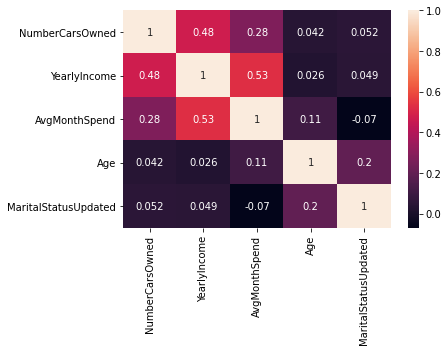

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()